In [1]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary

  u_D = 1 + x^2 + 2y^2
    f = -6
"""

from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TRICK for setting a fixed fontsize and figure size in Python
f = 0.6
plt.rcParams['figure.figsize'] = [16*f, 9*f]  # size in inches
plt.rcParams['figure.dpi'] = 150  # Resolution
plt.rcParams['font.size'] = 12

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

In [4]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [5]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [6]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

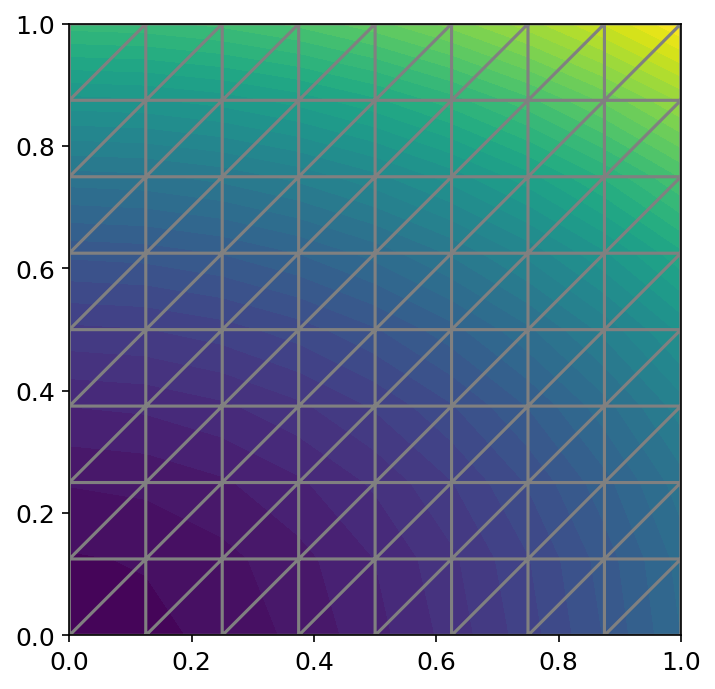

In [7]:
# Plot solution and mesh
plot(u)
plot(mesh)

In [8]:
# Save solution to file in VTK format
vtkfile = File('solution.pvd')
vtkfile << u

In [9]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.008235098073354851
error_max = 1.3322676295501878e-15
